In [1]:
import sys 
sys.path.append('../')

import torch 
import matplotlib.pyplot as plt
from utils import * 
from mlmm import *
from dataset import reference_test

In [2]:
# torch.set_printoptions(sci_mode=False)
# np.set_printoptions(formatter={'float_kind':'{:0.2e}'.format})

In [3]:
l = 13 # number of level, total number of points is 2^l-1
k = 5 # number of corase level
m = 7 # local range for correction
order = 2 # order of interpolation/restriction

#### MLMM accuracy test

In [4]:
kernels = ['cosine', 'lnabs', 'laplace', 'helmholtz']

In [5]:
for kernel in kernels:
    uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, kernel)
    wh_smooth_ml, KHH = SmoothKernelMLMM_full(uh, Khh, h, k, order)
    l1 = l1_norm(wh_smooth_ml[-1], wh_numeric)
    rl2 = rl2_error(wh_smooth_ml[-1], wh_numeric)
    print("{:}-smooth : L1 - {:.2e}, rL2 - {:.2e}".format(kernel, l1, rl2))
    wh_singular_ml, KHH, Khh_banddiff_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k, order, m)
    l1 = l1_norm(wh_singular_ml[-1], wh_numeric)
    rl2 = rl2_error(wh_singular_ml[-1], wh_numeric)
    print("{:}-singular : L1 - {:.2e}, rL2 - {:.2e}".format(kernel, l1, rl2))
    print('--------------------------------------')

cosine-smooth : L1 - 2.13e-05, rL2 - 2.57e-05
cosine-singular : L1 - 2.03e-05, rL2 - 2.44e-05
--------------------------------------
lnabs-smooth : L1 - 5.01e+00, rL2 - 3.75e+00
lnabs-singular : L1 - 6.19e-04, rL2 - 4.73e-04
--------------------------------------
laplace-smooth : L1 - 1.06e-07, rL2 - 3.55e-05
laplace-singular : L1 - 4.61e-10, rL2 - 1.46e-07
--------------------------------------
helmholtz-smooth : L1 - 2.57e-06, rL2 - 5.24e-04
helmholtz-singular : L1 - 2.70e-06, rL2 - 6.24e-04
--------------------------------------


#### MLMM accuracy on different range of local correction
wider local correction range will give better accuracy on "cosine", "lnabs"

In [6]:
l = 13 # number of level, total number of points is 2^l-1
k = 5 # number of corase level
order = 2 # order of interpolation/restriction

for kernel in ['cosine', 'lnabs', 'laplace']:
    for m in [3, 7, 15, 31]:
        uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, kernel)
        wh_singular_ml, KHH, Khh_banddiff_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k, order, m=m)
        l1 = l1_norm(wh_singular_ml[-1], wh_numeric)
        rl2 = rl2_error(wh_singular_ml[-1], wh_numeric)
        print("{:}-singular m-{:} : L1 - {:.2e}, rL2 - {:.2e}".format(kernel, m, l1, rl2))
    print('------------------------------------------------------')

cosine-singular m-3 : L1 - 2.08e-05, rL2 - 2.51e-05
cosine-singular m-7 : L1 - 2.03e-05, rL2 - 2.44e-05
cosine-singular m-15 : L1 - 1.92e-05, rL2 - 2.30e-05
cosine-singular m-31 : L1 - 1.71e-05, rL2 - 2.03e-05
------------------------------------------------------
lnabs-singular m-3 : L1 - 1.32e-03, rL2 - 1.01e-03
lnabs-singular m-7 : L1 - 6.19e-04, rL2 - 4.73e-04
lnabs-singular m-15 : L1 - 2.89e-04, rL2 - 2.21e-04
lnabs-singular m-31 : L1 - 1.29e-04, rL2 - 9.92e-05
------------------------------------------------------
laplace-singular m-3 : L1 - 4.61e-10, rL2 - 1.46e-07
laplace-singular m-7 : L1 - 4.61e-10, rL2 - 1.46e-07
laplace-singular m-15 : L1 - 4.61e-10, rL2 - 1.46e-07
laplace-singular m-31 : L1 - 4.61e-10, rL2 - 1.46e-07
------------------------------------------------------


#### MLMM accuracy on different level of coarse

In [7]:
l = 13 # number of level, total number of points is 2^l-1
m = 7 # number of corase level
order = 2 # order of interpolation/restriction

for kernel in ['cosine', 'lnabs', 'laplace']:
    for k in [1, 2, 3, 4, 5]:
        uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, kernel)
        wh_singular_ml, KHH, Khh_banddiff_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k=k, order=order, m=m)
        l1 = l1_norm(wh_singular_ml[-1], wh_numeric)
        rl2 = rl2_error(wh_singular_ml[-1], wh_numeric)
        print("{:}-singular k-{:} : L1 - {:.2e}, rL2 - {:.2e}".format(kernel, k, l1, rl2))
    print('------------------------------------------------------')

cosine-singular k-1 : L1 - 1.35e-07, rL2 - 1.93e-07
cosine-singular k-2 : L1 - 3.24e-07, rL2 - 4.21e-07
cosine-singular k-3 : L1 - 1.31e-06, rL2 - 1.60e-06
cosine-singular k-4 : L1 - 5.18e-06, rL2 - 6.25e-06
cosine-singular k-5 : L1 - 2.03e-05, rL2 - 2.44e-05
------------------------------------------------------
lnabs-singular k-1 : L1 - 2.10e-05, rL2 - 1.77e-05
lnabs-singular k-2 : L1 - 6.26e-05, rL2 - 4.90e-05
lnabs-singular k-3 : L1 - 1.45e-04, rL2 - 1.11e-04
lnabs-singular k-4 : L1 - 3.07e-04, rL2 - 2.35e-04
lnabs-singular k-5 : L1 - 6.19e-04, rL2 - 4.73e-04
------------------------------------------------------
laplace-singular k-1 : L1 - 4.88e-10, rL2 - 1.55e-07
laplace-singular k-2 : L1 - 4.69e-10, rL2 - 1.50e-07
laplace-singular k-3 : L1 - 4.68e-10, rL2 - 1.48e-07
laplace-singular k-4 : L1 - 4.57e-10, rL2 - 1.45e-07
laplace-singular k-5 : L1 - 4.61e-10, rL2 - 1.46e-07
------------------------------------------------------


MLMM speed test

In [8]:
k = 3
order=2
m =7
wh_singular_ml, KHH, Khh_banddiff_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k, order, m)

In [9]:
%%timeit 
wh = multi_summation(Khh, uh, h)

4.12 ms ± 57.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
wh_mlmm = SmoothKernelMLMM(KHH, uh, h, k)

715 µs ± 2.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
%%timeit
wh_mlmm = SingularSmoothKernelMLMM(KHH, uh, Khh_banddiff_lst, idx_j_lst, h, k=k)

1.68 ms ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Kernel Reconstruction

In [45]:
l = 8 
k = 5
m = 15
order = 2
uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, 'lnabs')
wh_singular_ml, KHH, Khh_banddiff_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k, order, m)

In [46]:
wh_singular_ml, KHH, Khh_banddiff_lst, idx_j_lst = SingularSmoothKernelMLMM_local(uh, Khh, h, k, order, m)
Khh_smooth = SmoothKernelReconstruction(KHH, l, k)
rl2 = matrl2_error(Khh_smooth[-1][0,0], Khh[0,0]).item()
print(f'smooth reconstruction : {rl2}')

Khh_singular = SingularSmoothKernelReconstruction(KHH, Khh_banddiff_lst, l, k, m)
rl2 = matrl2_error(Khh_singular[-1][0,0], Khh[0,0]).item()
print(f"singular smooth reconstruction : {rl2}")

smooth reconstruction : 3.833512544631958
singular smooth reconstruction : 2.4192678928375244


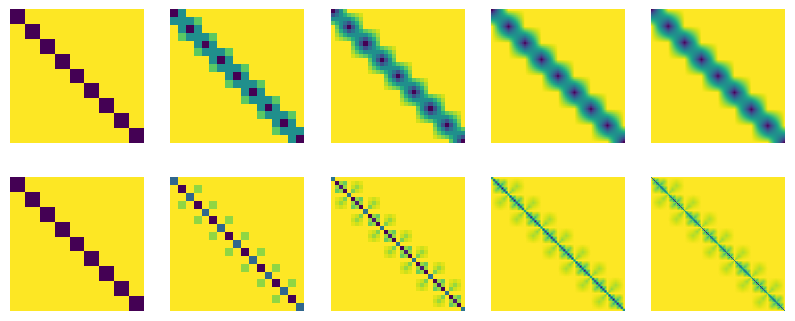

In [47]:
fig, axs = plt.subplots(2, k, figsize=(10, 4))
for i in range(k):
    axs[0,i].imshow(Khh_smooth[i][0,0])
    axs[0,i].axis('off')
    axs[1,i].imshow(Khh_singular[i][0,0])
    axs[1,i].axis('off')

local correction SVD : S is usually small, therefore correction is always low-rank

In [ ]:
for kernel in kernels:
    uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, kernel)
    wh_mlmm, KHH, Khh_correction_lst, nbr_idx_lst = SingularSmoothKernelMLMM_full(uh, Khh, h, k, order, m)
    for i, Khh_correction in enumerate(Khh_correction_lst):
        
        Khh_correction_even = Khh_correction[0,0,1::2,::2][10:-10]
        Khh_correction_odd = Khh_correction[0,0,::2][10:-10]

        U, S, Vh = torch.linalg.svd(Khh_correction_even)
        print('{:} - l : {:} - even : {:}'.format(kernel, i, S.numpy()[:5]))


        U, S, Vh = torch.linalg.svd(Khh_correction_odd)
        print('{:} - l : {:} - odd : {:}'.format(kernel, i, S.numpy()[:5]))          

cosine - l : 0 - even : [8.16e-04 5.02e-07 2.96e-07 1.75e-11 2.99e-14]
cosine - l : 0 - odd : [1.12e-03 5.42e-07 4.78e-07 2.54e-07 1.46e-07]
cosine - l : 1 - even : [2.94e-04 1.09e-11 1.43e-18 2.72e-25 5.99e-32]
cosine - l : 1 - odd : [4.05e-04 1.07e-11 1.53e-18 4.59e-25 1.21e-31]
cosine - l : 2 - even : [1.08e-04 6.36e-13 3.42e-20 5.29e-26 9.31e-33]
cosine - l : 2 - odd : [1.46e-04 2.05e-12 7.25e-19 4.35e-25 3.13e-31]
cosine - l : 3 - even : [4.00e-05 8.64e-13 3.45e-20 2.89e-25 1.11e-32]
cosine - l : 3 - odd : [5.10e-05 2.53e-12 1.11e-18 4.48e-25 3.79e-31]
cosine - l : 4 - even : [1.42e-05 1.55e-12 3.29e-21 3.13e-27 7.88e-33]
cosine - l : 4 - odd : [1.98e-05 1.00e-13 2.04e-21 8.05e-28 2.02e-33]
lnabs - l : 0 - even : [1.02e+03 2.58e-07 1.55e-14 2.52e-22 1.23e-27]
lnabs - l : 0 - odd : [1.77e+03 7.84e-05 2.26e-14 1.39e-20 4.63e-28]
lnabs - l : 1 - even : [1.46e+03 6.40e-07 2.41e-14 9.23e-21 1.01e-24]
lnabs - l : 1 - odd : [2.54e+03 3.71e-04 2.15e-13 7.11e-21 1.27e-27]
lnabs - l : 2 - e

In [ ]:
for i in range(k):
    n = Khh.shape[-1] # idx for (0), 1, 2, 3, 4, 5, 6, 7, (8) -> n=9

In [94]:
xH = restrict1d(xh)

In [47]:
uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, 'lnabs')
uh[0,0,-10:]

tensor([100.0044, 100.0039, 100.0034, 100.0029, 100.0024, 100.0020, 100.0015,
        100.0010, 100.0005, 100.0000])

In [21]:
l = 13
uh, Khh, h, wh_numeric, wh_analytic, xh = reference_test(l, 'lnabs')
# uh[:,:,0] = 0
# uh[:,:,-1] = 0

# wh_hom = torch.zeros_like(uh)
# wh_hom[:,:,0] += (Khh[:,:,0] * uh).sum() * h
# wh_hom[:,:,-1] += (Khh[:,:,-1] * uh).sum() * h
# wh_hom[:,:,1:-1] += (Khh[:,:,1:-1,0] * uh[:,:,1:-1]).sum() * h + (Khh[:,:,1:-1,-1] * uh[:,:,1:-1]).sum() * h 

# Khh[:,:,0] = 0
# Khh[:,:,-1] = 0
# Khh[:,:,:,0] = 0
# Khh[:,:,:,-1] = 0

# even
KHh = injection1d_rows(Khh) 
KHH = injection1d_cols(KHh)
KHh_smooth = interp1d_cols(KHH) # \tilde{K}
KHh_corr = KHh - KHh_smooth 

# approximation
# wH_smooth = multi_summation(KHh_smooth, uh, h) 
uH = restrict1d(uh)
wH_smooth = multi_summation(KHH, uH, h*2) 
print('no correction : ', l1_norm(interp1d(wH_smooth)[:,:,1:-1], wh_numeric[:,:,1:-1]))

# even correction
wH_corr = multi_summation(KHh_corr, uh, h)
wH_approx_even = wH_smooth + wH_corr
print('even correction : ', l1_norm(interp1d(wH_approx_even)[:,:,1:-1], wh_numeric[:,:,1:-1]))

# odd
Khh_smooth = interp1d_rows(KHh)[:,:,1::2]
Khh_corr = Khh[:,:,1::2] - Khh_smooth
wh_approx = interp1d(wH_approx_even).clone()
wh_approx[:,:,1::2] = wh_approx[:,:,1::2] + multi_summation(Khh_corr, uh, h)

# correct odd 
print(l1_norm(wh_hom + wh_approx, wh_numeric))

no correction :  tensor(24.3346)
even correction :  tensor(0.0254)
tensor(122.8150)


In [12]:
wh_hom[0,0]

tensor([ -85.8391, -122.8839, -122.8839,  ..., -122.8839, -122.8839,
         -85.8391])

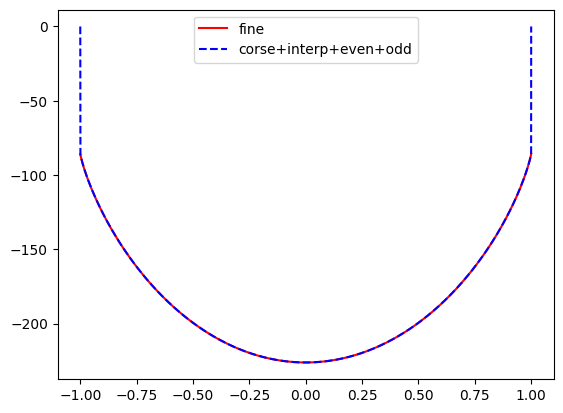

In [16]:
plt.plot(xh[0,0], wh_numeric[0,0], '-r', label='fine')
# plt.plot(xh[0,0], interp1d(wH_smooth)[0,0], '-g', label='corse+interp')
# plt.plot(xh[0,0], interp1d(wH_approx_even)[0,0], '-m', label='corse+interp+even')
plt.plot(xh[0,0], wh_approx[0,0], '--b', label='corse+interp+even+odd')
# plt.xlim([-1.0001, -0.9999])
plt.legend()

In [13]:
wh_even_smooth = multi_summation(Khh_even_[:,:,1:-1,1:-1], uh[:,:,1:-1], h) 
wh_even_correction = multi_summation(Khh_even_correction[:,:,1:-1,1:-1], uh[:,:,1:-1], h)
wh_even_gt = multi_summation(Khh_even[:,:,1:-1,1:-1], uh[:,:,1:-1], h)
wh_even_approx = wh_even_smooth + wh_even_correction

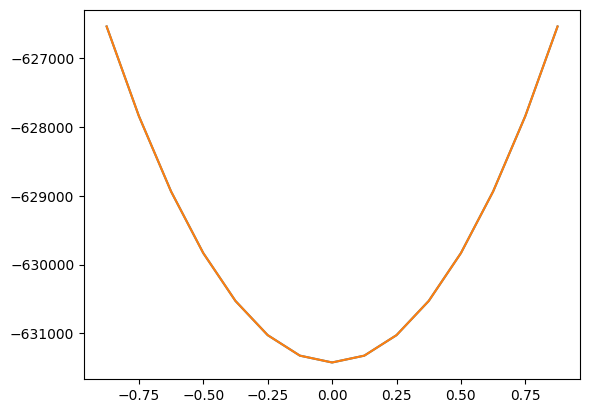

In [39]:
plt.plot(xH[0,0,1:-1], wh_even_gt[0,0])
plt.plot(xH[0,0,1:-1], wh_even_approx[0,0])

In [15]:
l1_norm(wh_even_approx, wh_even_gt)

tensor(0.0005)

In [61]:
wh_even_approx

tensor([[[-626539.8125, -627840.1875, -628936.8750, -629832.8125, -630528.5625,
          -631025.3750, -631323.3125, -631422.6250, -631323.3750, -631025.3750,
          -630528.5000, -629832.7500, -628936.9375, -627840.2500, -626539.8125]]])

In [62]:
wh_even_gt

tensor([[[-626539.5625, -627840.2500, -628936.8750, -629832.6875, -630528.5000,
          -631025.2500, -631323.1875, -631422.5625, -631323.3750, -631025.5000,
          -630528.6875, -629832.5625, -628936.8750, -627840.1875, -626539.7500]]])